In [1]:
import pandas as pd
import numpy as np
import pandas.plotting._matplotlib as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

train_data.head

<bound method NDFrame.head of               id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[150000 rows x 3 columns]>

In [3]:
train_data.drop_duplicates(subset=['document'], inplace=True)

<AxesSubplot:>

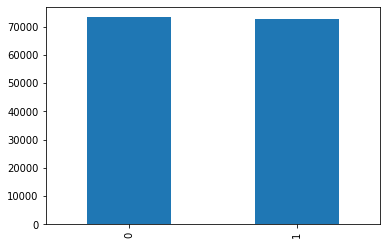

In [4]:
train_data['label'].value_counts().plot(kind='bar')

In [5]:
train_data.isnull().values.any()

True

In [6]:
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [7]:
train_data = train_data.dropna(how = 'any')
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [8]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-8-6948268dad63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [9]:
train_data[:10]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [10]:
train_data['document'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

/Users/miheuiseok/Documents/myLearnProject/NLP/nlp/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


id            0
document    391
label         0
dtype: int64

In [11]:
train_data = train_data.dropna(how = 'any')
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [12]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how = 'any')
test_data[:10]

,id,document,label
0,6270596,굳 ㅋ,1
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,7898805,음악이 주가 된 최고의 음악영화,1
6,6315043,진정한 쓰레기,0
7,6097171,마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가고개를 젖게한다,0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한남...,0
9,6242223,이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 모든 사람이 그렇지는 않네,1
10,7462111,괜찮네요오랜만포켓몬스터잼밌어요,1


In [13]:
print(len(train_data),len(test_data))

145791 48995


In [14]:
stopwords = ['아','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
okt = Okt()
x_train = []
for item in train_data['document']:
    temp = []
    temp = okt.morphs(item, stem=True)
    temp = [word for word in temp if not word in stopwords]
    x_train.append(temp)
x_train[:5]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다']]

In [16]:
x_test = []
for item in test_data['document']:
    temp = []
    temp = okt.morphs(item, stem=True)
    temp = [word for word in temp if not word in stopwords]
    x_test.append(temp)
x_test[:5]

[['굳다', 'ㅋ'],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'],
 ['만', '아니다', '별', '다섯', '개', '주다', '왜', '로', '나오다', '제', '심기', '불편하다'],
 ['음악', '주가', '되다', '최고', '음악', '영화']]

In [17]:
print(len(x_train))

145791


In [20]:
with open("x_train.csv", "w") as f:
    f.write(str(x_train))

In [21]:
with open("x_test.csv", "w") as f:
    f.write(str(x_test))

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [23]:
threshold = 3
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
        
print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43751
등장 빈도가 2번 이하인 희귀 단어의 수: 24337
단어 집합에서 희귀 단어의 비율: 55.62615711640877
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.876441680874536


In [24]:
vocab_size = total_cnt - rare_cnt + 2

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
print(x_train[:3])

[[454, 17, 260, 659], [933, 457, 42, 602, 2, 214, 1449, 25, 961, 675, 20], [386, 2444, 1, 2315, 5671, 3, 222, 10]]


In [25]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [28]:
drop_train = [index for index, sentence in enumerate(x_train) if len(sentence) < 1]
x_train = np.delete(x_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(x_train))
print(len(y_train))

145369
145369


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.97455440981227


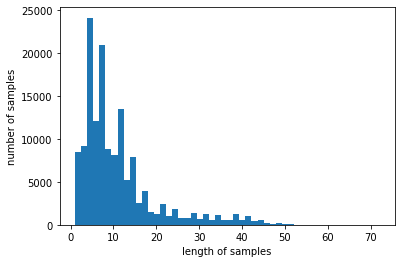

In [31]:
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(l) for l in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 30
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.10396989729584


In [33]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [34]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [36]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [38]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=5, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/5
1938/1939 [============================>.] - ETA: 0s - loss: 0.2703 - acc: 0.8876
Epoch 00001: val_acc improved from 0.85533 to 0.86032, saving model to best_model.h5
1939/1939 [==============================] - 78s 40ms/step - loss: 0.2703 - acc: 0.8876 - val_loss: 0.3283 - val_acc: 0.8603
Epoch 2/5
1939/1939 [==============================] - ETA: 0s - loss: 0.2548 - acc: 0.8962
Epoch 00002: val_acc did not improve from 0.86032
1939/1939 [==============================] - 73s 38ms/step - loss: 0.2548 - acc: 0.8962 - val_loss: 0.3362 - val_acc: 0.8581
Epoch 3/5
1939/1939 [==============================] - ETA: 0s - loss: 0.2395 - acc: 0.9027
Epoch 00003: val_acc did not improve from 0.86032
1939/1939 [==============================] - 73s 38ms/step - loss: 0.2395 - acc: 0.9027 - val_loss: 0.3575 - val_acc: 0.8533
Epoch 4/5
1939/1939 [==============================] - ETA: 0s - loss: 0.2241 - acc: 0.9106
Epoch 00004: val_acc did not improve from 0.86032
1939/1939 [===========

In [39]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

1532/1532 [==============================] - 9s 6ms/step - loss: 0.3365 - acc: 0.8550

 테스트 정확도: 0.8550


In [40]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [41]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

93.99% 확률로 긍정 리뷰입니다.



In [42]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

81.25% 확률로 긍정 리뷰입니다.

